### f_dec

In [1]:
import numpy as np
# path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/correcciones/'
path = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/'
data = np.loadtxt(path + 'M31_param4fdisk_GD.dat')
time_M31gd = data[:,0]
r50_M31gd  = data[:,1]
rmax_M31gd = data[:,2]
Rd_M31gd   = data[:,3]
rgal_M31gd = data[:,4]
Mgal_M31gd = data[:,5]
Md_M31gd   = data[:,6]
Vmax_M31gd = data[:,7]
V50_M31gd  = data[:,8]


data = np.loadtxt(path + 'MW_param4fdisk_GD.dat')
time_MWgd = data[:,0]
r50_MWgd  = data[:,1]
rmax_MWgd = data[:,2]
Rd_MWgd   = data[:,3]
rgal_MWgd = data[:,4]
Mgal_MWgd = data[:,5]
Md_MWgd   = data[:,6]
Vmax_MWgd = data[:,7]
V50_MWgd  = data[:,8]

data = np.loadtxt(path + 'M33_param4fdisk_GD.dat')
time_M33gd = data[:,0]
r50_M33gd  = data[:,1]
rmax_M33gd = data[:,2]
Rd_M33gd   = data[:,3]
rgal_M33gd = data[:,4]
Mgal_M33gd = data[:,5]
Md_M33gd   = data[:,6]
Vmax_M33gd = data[:,7]
V50_M33gd  = data[:,8]


data = np.loadtxt(path + 'M31_param4fdisk_GS.dat')
time_M31gs = data[:,0]
r50_M31gs  = data[:,1]
rmax_M31gs = data[:,2]
Rd_M31gs   = data[:,3]
rgal_M31gs = data[:,4]
Mgal_M31gs = data[:,5]
Md_M31gs   = data[:,6]
Vmax_M31gs = data[:,7]
V50_M31gs  = data[:,8]


data = np.loadtxt(path + 'MW_param4fdisk_GS.dat')
time_MWgs = data[:,0]
r50_MWgs  = data[:,1]
rmax_MWgs = data[:,2]
Rd_MWgs   = data[:,3]
rgal_MWgs = data[:,4]
Mgal_MWgs = data[:,5]
Md_MWgs   = data[:,6]
Vmax_MWgs = data[:,7]
V50_MWgs  = data[:,8]

data = np.loadtxt(path + 'M33_param4fdisk_GS.dat')
time_M33gs = data[:,0]
r50_M33gs  = data[:,1]
rmax_M33gs = data[:,2]
Rd_M33gs   = data[:,3]
rgal_M33gs = data[:,4]
Mgal_M33gs = data[:,5]
Md_M33gs   = data[:,6]
Vmax_M33gs = data[:,7]
V50_M33gs  = data[:,8]

In [9]:
fdec_M31gd = V50_M31gd/Vmax_M31gd
fdec_MWgd = V50_MWgd/Vmax_MWgd
fdec_M33gd = V50_M33gd/Vmax_M33gd

fdec_M31gs = V50_M31gs/Vmax_M31gs
fdec_MWgs = V50_MWgs/Vmax_MWgs
fdec_M33gs = V50_M33gs/Vmax_M33gs

(0.5, 1.1)

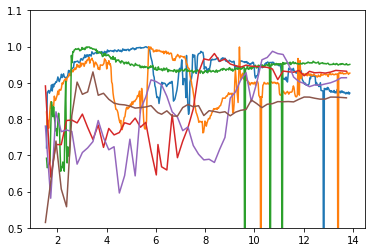

In [12]:
import matplotlib.pyplot as plt
plt.plot(time_M31gd,fdec_M31gd)
plt.plot(time_MWgd,fdec_MWgd)
plt.plot(time_M33gd,fdec_M33gd)
plt.plot(time_M31gs,fdec_M31gs)
plt.plot(time_MWgs,fdec_MWgs)
plt.plot(time_M33gs,fdec_M33gs)
plt.ylim(0.5,1.1)

## Fdisk Gadget

In [8]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import time_conversion as tiempo
import density
import rotation_mio as rot

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

path = '/home/ornela/SimCLUES/'
# path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

# path = '/mnt/is2/alejandro/ornella/'
##hasta 50

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
#     print aexp[isnap]

#     lala

    for i in range(0,1):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr*1e10/h
        mgas = mgas*1e10/h
        mdrk = mdrk*1e10/h
        
        r200 = r200*aexp[isnap]/h
        
#         print 'r200 =', r200
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        Mgal_str = np.cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
    

    #------------------ calculamos M90------------------------------------------
        razon  = Mgal_str/M_gal
        cincuenta,    = np.where(razon < 0.50)

        r50 = r_sort[cincuenta][-1]
        M50 = Mgal_str[cincuenta][-1]

        #componentes de la velocidad del centro de masa
        veloc, = np.where(rstr < r50)

        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

        #velocidades de las estrellas respecto del centro de masa de la galaxia
        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm

        #-------------------------------------------------------------------------------------
        #hago la rotación de las coordenadas respecto del momento angular    
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz

        rn = np.sqrt(xn**2 + yn**2 + zn**2 )

        limit, = np.where(rn < rgal )

        R = np.sqrt(xn[limit]**2+yn[limit]**2)

        nbin = 25
        den, Rbin = density.surf_density(R,mstr[limit],nbin)
        
        
        cut, = np.where(Rbin > 3*aexp[isnap])
        pol  = np.polyfit(Rbin[cut],np.log(den[cut]),1)

        Rd = -1./pol[0]

        Md = 2*np.pi*np.exp(pol[1])*Rd**2

    #--------------------------------------------         
        rtot = np.concatenate([rstr, rgas, rdrk])
        mtot = np.concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot<r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])
        
        limit_drk   = np.where(rdrk<r200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rtot[limit_drk])
        
        Mc_drk = np.cumsum(mdrk[limit_drk][rdrk_indice])
        
#-------------------------------------------------------------- 
        Mtot_50 = Mc_tot[np.where(rtot_sort < r50)][-1]

        Vr50 = np.sqrt((G*Mtot_50)/r50)
        Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
        
        fdisk = Vr50 / np.sqrt((G*M_gal)/r50)

        fdec = Vr50/Vdrk.max()
        
        
        path3 = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/'
        archivo =  open(path3 + str('%s'%vector2[i]) + '_fdec_GD.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                      str('%12.6f'% fdisk) +'\t'+
                      str('%12.6f'% fdec) +'\n')
        archivo.close()


(118.10883, 1.3580178422792604)
(118.0276, 1.3558786753253762)
(117.90182, 1.3614984362594338)
(117.76421, 1.3583438408653892)
(117.84192, 1.3623423517468096)
(118.16558, 1.357550837557031)
(118.50528, 1.3568167681451124)


KeyboardInterrupt: 

In [4]:
import numpy as np
# path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/correcciones/'
path = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/'
data = np.loadtxt(path + 'M31_fdec_GD.dat')
time_M31gd  = data[:,0]
fdisc_M31gd = data[:,1]
fdec_M31gd  = data[:,2]

data = np.loadtxt(path + 'MW_fdec_GD.dat')
time_MWgd  = data[:,0]
fdisc_MWgd = data[:,1]
fdec_MWgd  = data[:,2]


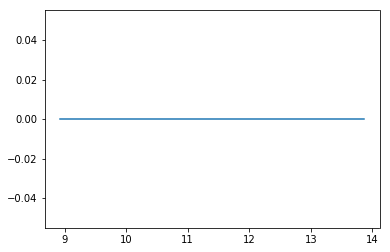

In [5]:
import matplotlib.pyplot as plt

plt.plot(time_M31gd, fdec_M31gd)